In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pickle


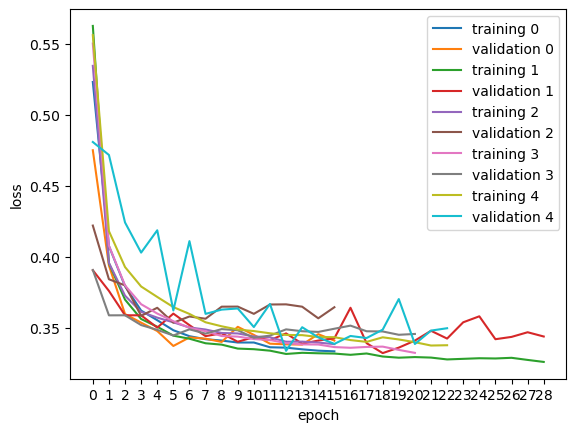

In [5]:

with open("losses.pickle", 'rb') as out:
    losses = pickle.load(out)

# plot loss
fig, a = plt.subplots()
tick = np.arange(max([len(losses[i]['training']) for i in losses]))

for i in losses:
    train_losses = losses[i]['training']
    val_losses = losses[i]['val']
    
    x = len(train_losses)
    a.plot(list(range(x)), train_losses, label='training '+str(i))
    a.plot(list(range(x)), val_losses, label='validation '+str(i))

    plt.xticks(tick)
    a.set_xlabel('epoch')
    a.set_ylabel('loss')
    a.legend()

# plt.savefig("default.png")
plt.show()

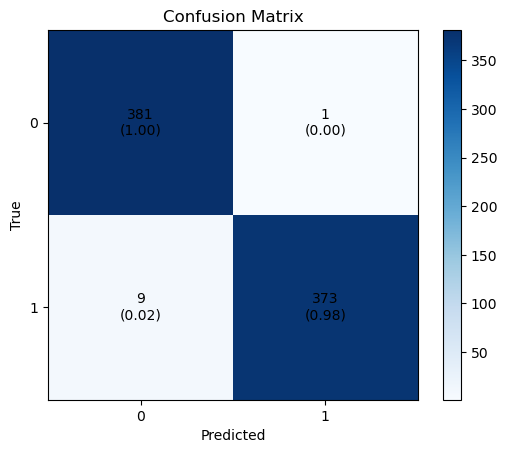

In [6]:
# plot confusion matrix
class_labels = [0,1]

true_labels = []
pred_labels = []
with open("labels.txt", 'r') as out:
    for line in out:
        a, b = line.strip().split()
        pred_labels.append(int(a))
        true_labels.append(int(b))

cm = confusion_matrix(true_labels, pred_labels)
accuracy = cm / np.sum(cm, axis=1, keepdims=True)

fig, ax = plt.subplots()
# im = ax.imshow(cm, cmap='Blues')
im = ax.imshow(accuracy, cmap='Blues', vmin = 0, vmax = 1) # Use accuracy values and set vmin/vmax

# Add accuracy values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]}\n({accuracy[i, j]:.2f})", ha='center', va='center')

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Display the plot
# plt.savefig("0616_m.png")
plt.show()